In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import os
import numpy as np
import contextily as ctx
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
from matplotlib.colorbar import ColorbarBase

In [3]:
# Load the average variance predictions
predictions = pd.read_csv(
    "../hazard_outputs/4179_training_eqs_500_epochs_no_source/testing/site_variances.csv"
)

# predictions = pd.read_csv(
#     "../hazard_outputs/400_training_eqs_2000_epochs_no_source(400candidateCondition)/site_variances.csv"
# )

In [ ]:
predictions_gdf = gpd.GeoDataFrame(
    predictions,
    geometry=gpd.points_from_xy(predictions.site_lon, predictions.site_lat),
    crs="EPSG:4326",
)

RMSE for s399: 0.41664193525980564
Mean bias for s399: 0.0008292368516630978


Text(0.5, 0, 'Predicted Residual Median (log g)')

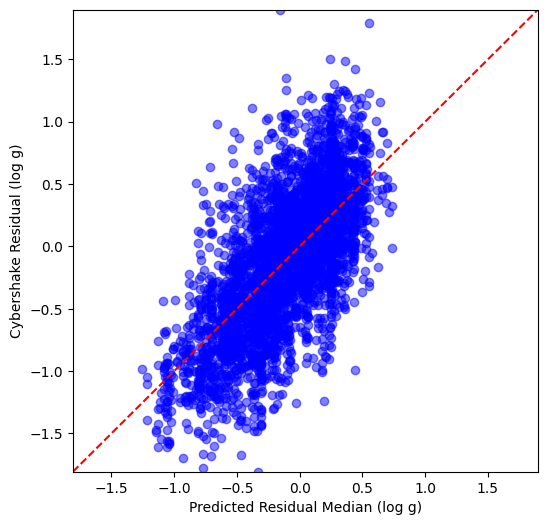

In [13]:
site_to_compare = "s399"
site_predictions = pd.read_csv(
    f"../hazard_outputs/4179_training_eqs_500_epochs_no_source/testing/{site_to_compare}/predictions.csv"
)
RMSE = np.sqrt(np.mean((site_predictions["mean"] - site_predictions["cybershake_res"]) ** 2))
print(f"RMSE for {site_to_compare}: {RMSE}")
mean_bias = np.mean(site_predictions["mean"] - site_predictions["cybershake_res"])
print(f"Mean bias for {site_to_compare}: {mean_bias}")
fig, ax = plt.subplots(figsize=(6, 6))
sc = ax.scatter(
    site_predictions["mean"], site_predictions["cybershake_res"], c="blue", alpha=0.5
)
upper_lim = max(site_predictions["cybershake_res"].max(), site_predictions["mean"].max())
lower_lim = min(site_predictions["cybershake_res"].min(), site_predictions["mean"].min())
ax.plot([lower_lim, upper_lim], [lower_lim, upper_lim], color="red", linestyle="--")
ax.set_xlim(lower_lim, upper_lim)
ax.set_ylim(lower_lim, upper_lim)
ax.set_ylabel("Cybershake Residual (log g)")
ax.set_xlabel("Predicted Residual Median (log g)")